In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
users = pd.read_csv("users.csv") 
candidate = pd.read_csv("candidate.csv") 

# 1 Para la tabla de users, calcule y cree las siguientes nuevas columnas:

## a.  Año de la deuda más antigua de cada usuario.

In [3]:
data_1_1 = pd.merge(users, candidate[['extra', 'identity_code']], how="inner", left_on="identity_code", right_on="identity_code") 
# SUPONEMOS QUE LA COLUMNA 'extra' CONTIENE LA FECHA DE LA DEUDA EN LUGAR DE debt_date (YA QUE ESTA CONTIENE MUCHOS NULOS) 
index = data_1_1.extra.isna()
data_1_1 = data_1_1[~index]
data_1_1['ANIO_DEUDA'] = data_1_1.apply( lambda l : re.sub('{"antiquity":', "", str(l['extra']) )  , axis=1) 
data_1_1['ANIO_DEUDA'] = data_1_1.apply( lambda l : re.sub('"', "", str(l['ANIO_DEUDA']) )  , axis=1) 
data_1_1['ANIO_DEUDA'] = data_1_1.apply( lambda l : re.sub('"', "", str(l['ANIO_DEUDA']) )  , axis=1) 
data_1_1['ANIO_DEUDA'] = data_1_1.apply( lambda l : str(l['ANIO_DEUDA']).split(",")[0]   , axis=1) 

data_1_1 # -> hacer join con tabla de USERs : falta definir si un nulo es adecuado para los que se desconoce el año de la deuda más antigua

,user_id,identity_code,gender,birthday,cellphone,phone_verified,freemium,country_code,date_joined,last_login,...,has_address,address_created,has_omited_buro,has_score_buro,has_score_buro_complete,has_register_complete,identity_code_created,registration_date,extra,ANIO_DEUDA
0,2814338861,3731321800,f,1964-03-03T00:00:00Z,NaN,0.0,0.0,cl,2021-06-01 20:07:37.000,2021-06-30 15:27:45.000,...,True,2021-06-01 20:13:54.000,False,False,False,True,2021-06-01 20:10:58.677,2021-06-01 20:13:54.000,"{""antiquity"":""1999"",""product_detail"":""31783345...",1999
3,2647368769,603804005,f,1977-10-11,NaN,NaN,NaN,cl,2016-09-13 06:48:37.000,2016-09-15 05:34:44.000,...,True,2016-09-15 05:38:21.000,False,False,False,True,2016-09-13 06:48:49.000,2016-09-15 05:38:21.000,"{""antiquity"":""2000"",""product_detail"":""22731058...",2000
10,2503582503,506792771,f,1985-02-18T00:00:00Z,NaN,NaN,NaN,cl,2019-05-24 08:23:25.000,2021-11-20 18:11:56.000,...,True,2020-04-29 19:17:15.000,False,False,False,True,2020-04-29 19:16:08.262,2020-04-29 19:17:15.000,"{""antiquity"":""2021"",""product_detail"":""10471160...",2021
15,3861733674,735296655,f,1981-09-01T00:00:00Z,967001461.0,1.0,0.0,cl,2020-11-19 11:35:17.000,2023-06-21 12:49:26.000,...,True,2020-11-19 11:38:21.000,False,False,False,True,2020-11-19 11:37:50.894,2020-11-19 11:38:21.000,"{""antiquity"":""2022"",""product_detail"":""10167231...",2022
16,3861733674,735296655,f,1981-09-01T00:00:00Z,967001461.0,1.0,0.0,cl,2020-11-19 11:35:17.000,2023-06-21 12:49:26.000,...,True,2020-11-19 11:38:21.000,False,False,False,True,2020-11-19 11:37:50.894,2020-11-19 11:38:21.000,"{""antiquity"":""2003"",""product_detail"":""22567364...",2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14800,3465828741,1261881570,f,1986-10-22,NaN,NaN,NaN,cl,2018-06-16 15:48:38.000,2021-01-25 13:33:43.000,...,True,2018-06-16 16:00:46.000,False,False,False,True,2018-06-16 15:48:50.000,2018-06-16 16:00:46.000,"{""antiquity"":""2022"",""product_detail"":""40507987...",2022
14801,4244811576,2723554534,f,1964-04-11,NaN,NaN,NaN,cl,2019-06-11 12:16:06.000,2022-10-20 16:59:27.000,...,True,2019-06-11 16:24:21.000,False,False,False,True,2019-06-11 16:16:07.000,2019-06-11 16:24:21.000,"{""antiquity"":""2015"",""product_detail"":""22672184...",2015
14807,2396076563,2371471915,m,1971-12-15T00:00:00Z,NaN,0.0,0.0,cl,2023-01-04 14:18:27.000,2023-01-04 14:20:05.000,...,NaN,NaN,False,False,False,NaN,2023-01-04 14:21:16.439,NaN,"{""antiquity"":""2002"",""product_detail"":""15620853...",2002
14809,3933793265,3633596764,f,1996-05-22T00:00:00Z,NaN,NaN,NaN,cl,2018-06-28 05:07:34.000,2022-09-15 02:14:11.000,...,True,2020-07-12 17:43:27.000,False,False,False,True,2020-07-12 17:42:57.300,2020-07-12 17:43:27.000,"{""antiquity"":""2022"",""product_detail"":""421469434""}",2022


# b. Cantidad de receptores para cada usuario.

In [4]:
data_1_2 = pd.merge(users, candidate[['receiver_tag_id', 'identity_code']], how="left", left_on="identity_code", right_on="identity_code") 
data_1_2[['user_id', 'receiver_tag_id']].groupby(['user_id']) ['receiver_tag_id'].count()

user_id
223682        1
329620        1
571275        1
1138942       1
1214148       1
             ..
4293771767    0
4294111321    0
4294133517    1
4294177605    1
4294599844    1
Name: receiver_tag_id, Length: 17196, dtype: int64

## c. Id de la deuda con el menor monto a pagar.

In [5]:
data_1_3 = pd.merge(users, candidate[['id', 'debt_amount',  'identity_code']], how="inner", left_on="identity_code", right_on="identity_code") 
data_1_3 = data_1_3.sort_values( by = 'debt_amount' ) 
data_1_3[['id', 'debt_amount']].head(2)

,id,debt_amount
9091,1003851399,2601.0
4466,2448706599,4219.0


## d. Monto promedio adeudado por cada usuario.

In [40]:
data_1_4 = pd.merge(users, candidate[[ 'debt_amount',  'identity_code']], how="left", left_on="identity_code", right_on="identity_code") 
data_1_4[['user_id', 'debt_amount']].groupby(['user_id'])['debt_amount'].mean()
plot1 = data_1_4[['user_id', 'debt_amount']].groupby(['user_id'])['debt_amount'].mean()
plot1 = pd.DataFrame(plot1 ) 
plot1.reset_index(inplace=True) 
plot1

,user_id,debt_amount
0,223682,349736.0
1,329620,749405.0
2,571275,19562.0
3,1138942,567602.0
4,1214148,39069.0
...,...,...
17191,4293771767,NaN
17192,4294111321,NaN
17193,4294133517,480512.0
17194,4294177605,182115.0


## e. Monto promedio a pagar por cada usuario.


In [7]:
data_1_5 = pd.merge(users, candidate[[ 'max_discount',  'debt_amount', 'identity_code']], how="left", left_on="identity_code", right_on="identity_code") 
data_1_5["PorPagar"] =  ((100-data_1_5["max_discount"])/100)*data_1_5['debt_amount']
data_1_5[['user_id', "PorPagar"]].groupby(['user_id'])["PorPagar"].mean()

user_id
223682        349736.00
329620        374702.50
571275         19562.00
1138942       272448.96
1214148        19925.19
                ...    
4293771767          NaN
4294111321          NaN
4294133517    403630.08
4294177605     56455.65
4294599844     38220.52
Name: PorPagar, Length: 17196, dtype: float64

# 2. Cree una nueva tabla llamada receivers, agregada a nivel de receiver_id, que contenga las siguientes columnas:



## a. Cantidad de subinstituciones por cada institución.



In [8]:
receiver_tag = pd.read_csv("receiver_tag.csv") 
#receivers = pd.merge(candidate[['receiver_tag_id']], receiver_tag[['receiver_id', 'id']], how ='left', left_on='receiver_tag_id', right_on='receiver_id')
receivers = receiver_tag.groupby(['receiver_id'])['id'].count()
receivers = pd.DataFrame(receivers)
receivers.reset_index(inplace=True) 
receivers.columns = ["receiver_tag_id", "Cantidad_subinstituciones"]
receivers = receivers.sort_values(by = "Cantidad_subinstituciones", ascending=False) 
receivers

,receiver_tag_id,Cantidad_subinstituciones
8,221,7
10,257,5
0,18,4
6,171,3
2,72,2
5,163,2
9,253,2
1,52,1
3,76,1
4,99,1


## b. Cantidad de personas que adeudan algo con cada receiver.

In [9]:
x = pd.merge(users[["user_id", "identity_code"]], candidate[[ "receiver_tag_id", 'identity_code']], how="left", left_on="identity_code", right_on="identity_code") 
x = x[['user_id', 'receiver_tag_id']].groupby(["receiver_tag_id"])['user_id'].count()
x = pd.DataFrame(x) 
x.reset_index(inplace=True) 
x.columns = [ 'receiver_tag_id', "Personas_por_receiver"]
receivers = pd.merge(x, receivers, how= 'left') 
receivers = receivers.sort_values( by = 'Cantidad_subinstituciones') 
receivers # solo un registro de subinstitución no nulo pues es el unico que hace match en las tres tablas que tenemos 

,receiver_tag_id,Personas_por_receiver,Cantidad_subinstituciones
20,199.0,130,1.0
0,56.0,159,NaN
1,63.0,178,NaN
2,79.0,328,NaN
3,107.0,9,NaN
...,...,...,...
159,637.0,23,NaN
160,638.0,12,NaN
161,639.0,21,NaN
162,650.0,1,NaN


## c. Cantidad de usuarios Destácame que adeudan algo con cada receiver.

En este caso es el mismo que el punto anterior pues no encontramos registros de personas fuera de la tabla users 

## d. Monto promedio adeudado por personas en general y Monto promedio adeudado de usuarios Destácame. 



In [10]:
x = candidate.groupby(['receiver_tag_id'])['debt_amount'].mean()
x = pd.DataFrame(x) 
x.reset_index(inplace=True) 
x.columns = ['receiver_tag_id', 'Monto_promedio_adeudado']
receivers = pd.merge(x, receivers, how= 'left') 
receivers

,receiver_tag_id,Monto_promedio_adeudado,Personas_por_receiver,Cantidad_subinstituciones
0,56,3.666475e+05,159,NaN
1,63,1.747686e+05,178,NaN
2,79,9.454214e+04,328,NaN
3,107,1.366667e+05,9,NaN
4,111,6.408131e+05,22,NaN
...,...,...,...,...
159,637,3.758710e+05,23,NaN
160,638,2.948840e+05,12,NaN
161,639,1.706840e+05,21,NaN
162,650,3.142180e+05,1,NaN


# 3. Calcule, para las tablas de users y receivers


Para users: 
- Promedio del monto adeudado.


In [11]:
users_mas = pd.merge( users, candidate, how='left') 
users_mas.debt_amount.mean()


1018170.042527339

- Promedio del monto a pagar 

In [12]:
( (( 100- users_mas.max_discount )/100 )*users_mas.debt_amount).mean()

408083.04533423105

Para receivers: 
- Promedio del monto adeudado: 


In [13]:
receivers.Monto_promedio_adeudado.mean()

2122967.6597791915

- Promedio del monto a pagar



Para este punto necesito calcular la columna "Monto promedio por pagar por receiver"

In [14]:
candidate["Monto_por_pagar"] = ((100-candidate.max_discount)/100)*candidate.debt_amount
x = candidate.groupby(['receiver_tag_id'])['Monto_por_pagar'].mean()
x = pd.DataFrame(x) 
x.reset_index(inplace=True) 
x.columns = ['receiver_tag_id', 'Monto_promedio_por_pagar']
receivers = pd.merge(x, receivers, how= 'left') 
receivers

,receiver_tag_id,Monto_promedio_por_pagar,Monto_promedio_adeudado,Personas_por_receiver,Cantidad_subinstituciones
0,56,307999.703459,3.666475e+05,159,NaN
1,63,22786.288034,1.747686e+05,178,NaN
2,79,19681.284177,9.454214e+04,328,NaN
3,107,19774.283333,1.366667e+05,9,NaN
4,111,49196.247727,6.408131e+05,22,NaN
...,...,...,...,...,...
159,637,317447.948696,3.758710e+05,23,NaN
160,638,103839.834167,2.948840e+05,12,NaN
161,639,138016.385714,1.706840e+05,21,NaN
162,650,191672.980000,3.142180e+05,1,NaN


In [15]:
receivers.Monto_promedio_por_pagar.mean()

500997.49347072584

# 4. Explique por qué cree usted que existen diferencias entre las tablas para los cálculos del punto 3.



Las diferencias entre los montos promedios calculados entre las tablas se deben precisamente a que son promedios. 
Aunque en ambos casos se divide una cantidad fija, ya sea la cantidad total que se debe (como en el primer caso) o la cantidad máxima que se pagará (como en el segundo) el “n” en el que se divide es diferente en cada caso. En el caso de la tabla users se divide simplemente en el número de usuarios mientras que para el caso de receivers se divide entre el número de receivers que existen por lo que el promedio es mayor al ser el número de receivers menor que el de usuarios.   


# 5 . Dashboard

In [50]:
from plotnine import * 
#data_1_1.to_csv("data_1_1.csv", index=False)

#ggplot( data_1_1, aes( x='ANIO_DEUDA')) + geom_histogram() + theme_minimal()

En un dashbord buscaria poner la metrica de deuda promedio o bien la cantidad maxima a pagar promedio por persona como indicadores generales. 

En este caso como realizar grafícas de ellas en forma de semaforos o simples barras es muy elaborado los dejo indicadas como un histograma. 

/Users/antonio/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 3849 rows containing non-finite values.
/Users/antonio/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


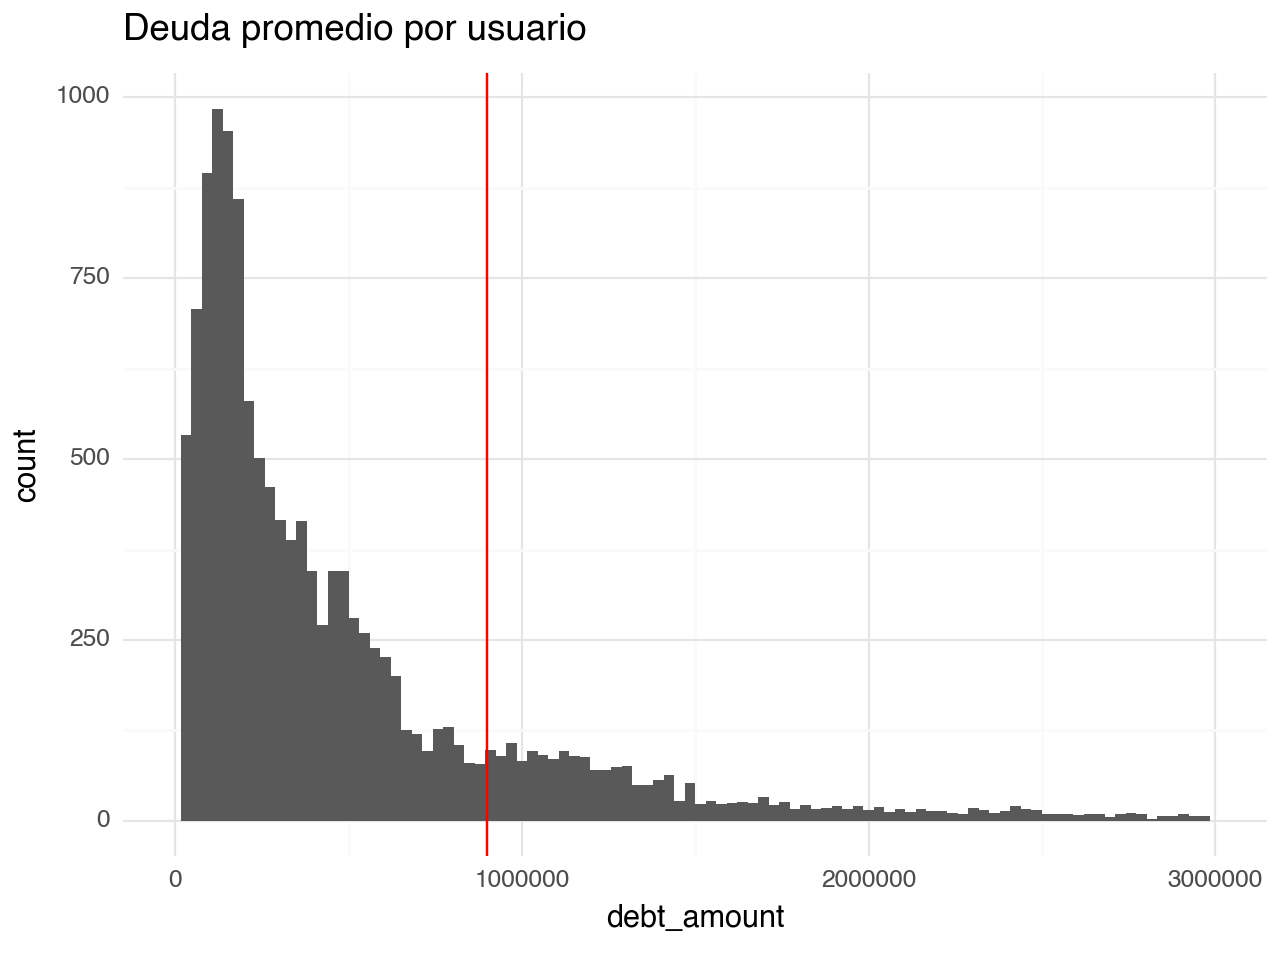

<Figure Size: (640 x 480)>

In [57]:
ggplot(plot1, aes(x='debt_amount')) + geom_histogram(bins=100) +geom_vline(xintercept=plot1.debt_amount.mean(), color= "red") + xlim([0, 3000000])+  theme_minimal() +ggtitle("Deuda promedio por usuario")

En una sección de receivers, graficaria el top de los receiver con más usuarios para prestarle atención a la atención al cliente y saber en donde concentrar esfuerzos y en donde podría haber alta transaccionalidad. 

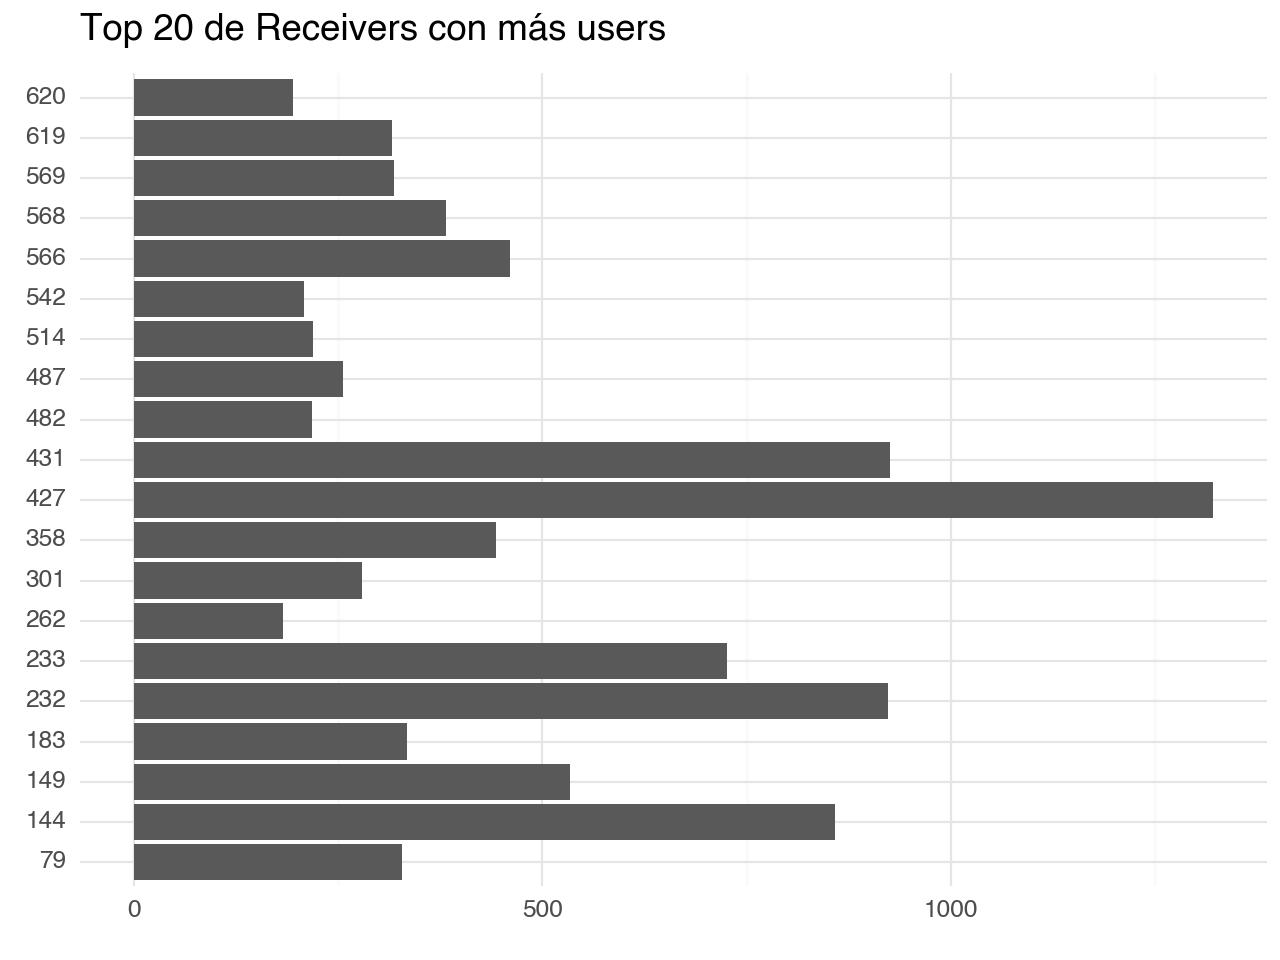

<Figure Size: (640 x 480)>

In [74]:


receivers_plot = receivers.sort_values( by= 'Personas_por_receiver', ascending=False).head(20)  
receivers_plot
ggplot(receivers_plot, aes( x='factor(receiver_tag_id)', y = 'Personas_por_receiver')) + geom_col() + coord_flip() + ggtitle("Top 20 de Receivers con más users") +\
ylab("") + xlab("") + theme_minimal()

Junto al volumen de usuarios tambien por cada receiver graficaria el monto promedio para los top

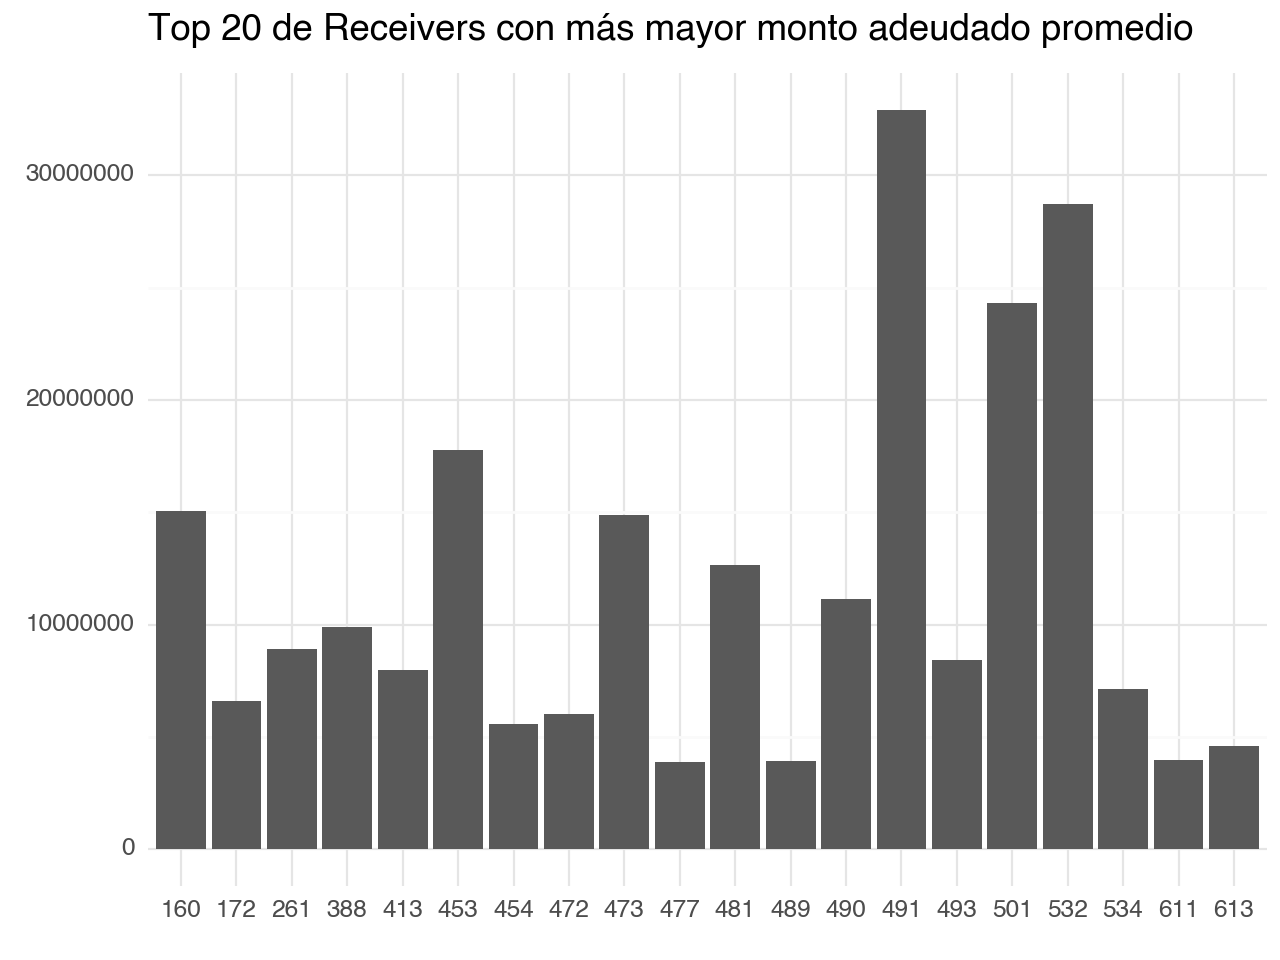

<Figure Size: (640 x 480)>

In [77]:

receivers_plot = receivers.sort_values( by= 'Monto_promedio_adeudado', ascending=False).head(20)  
ggplot(receivers_plot, aes( x='factor(receiver_tag_id)', y = 'Monto_promedio_adeudado')) + geom_col()  + ggtitle("Top 20 de Receivers con más mayor monto adeudado promedio") +\
ylab("") + xlab("") + theme_minimal()

En otro apartado del dashboard tendria un descriptivo de los usuarios. 

Donde tendría la distribución del país, sexo, 




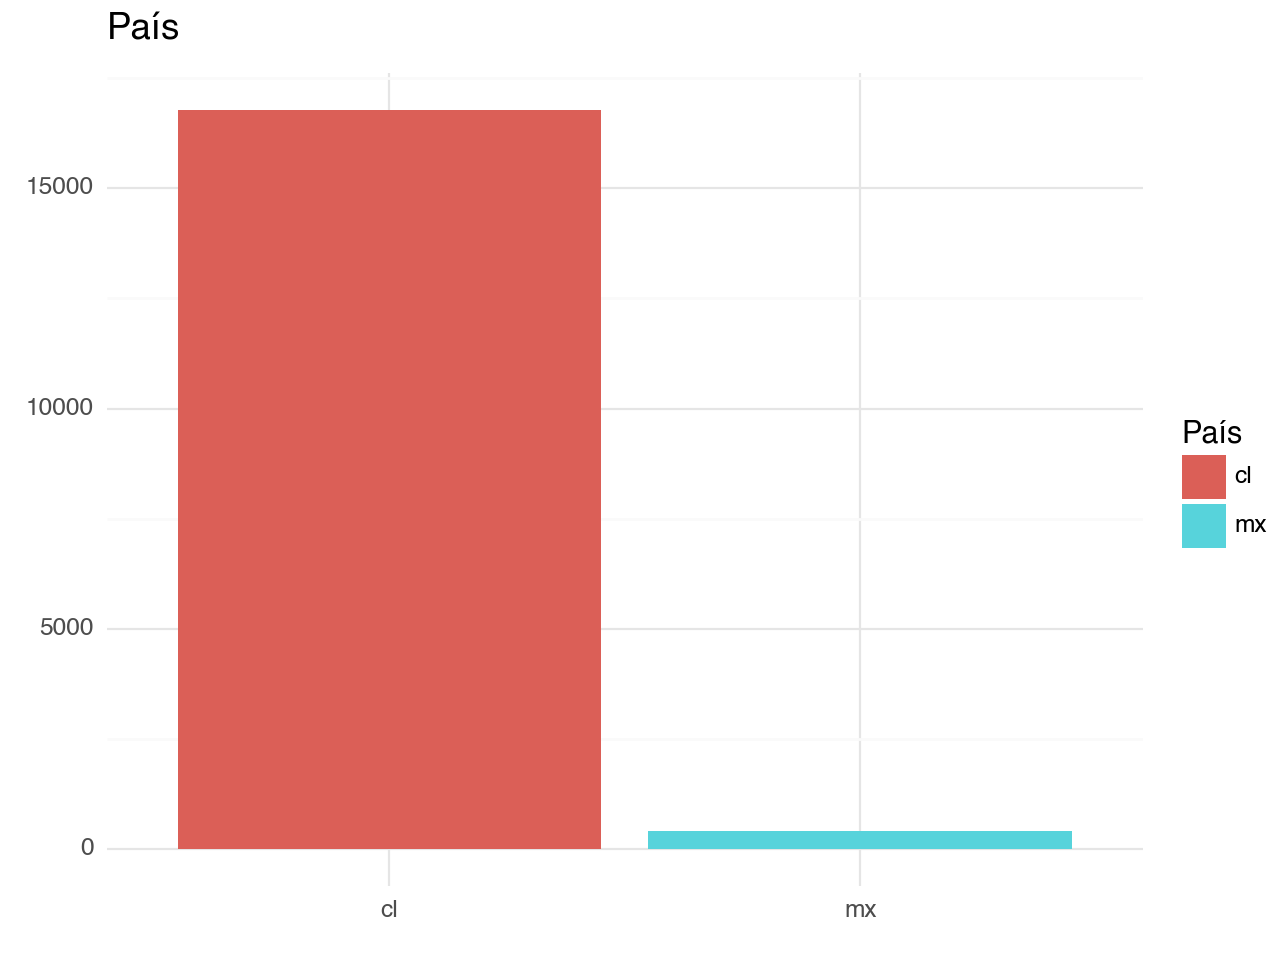

<Figure Size: (640 x 480)>

In [87]:
p1 = users.country_code.value_counts()
p1 = pd.DataFrame(p1) 
p1.reset_index(inplace=True)
p1.columns = ["País", "conteo"]
ggplot(p1, aes( x= 'País', y="conteo", fill= 'País')) + geom_col() + theme_minimal() + ggtitle("País")  + xlab("") + ylab("") 

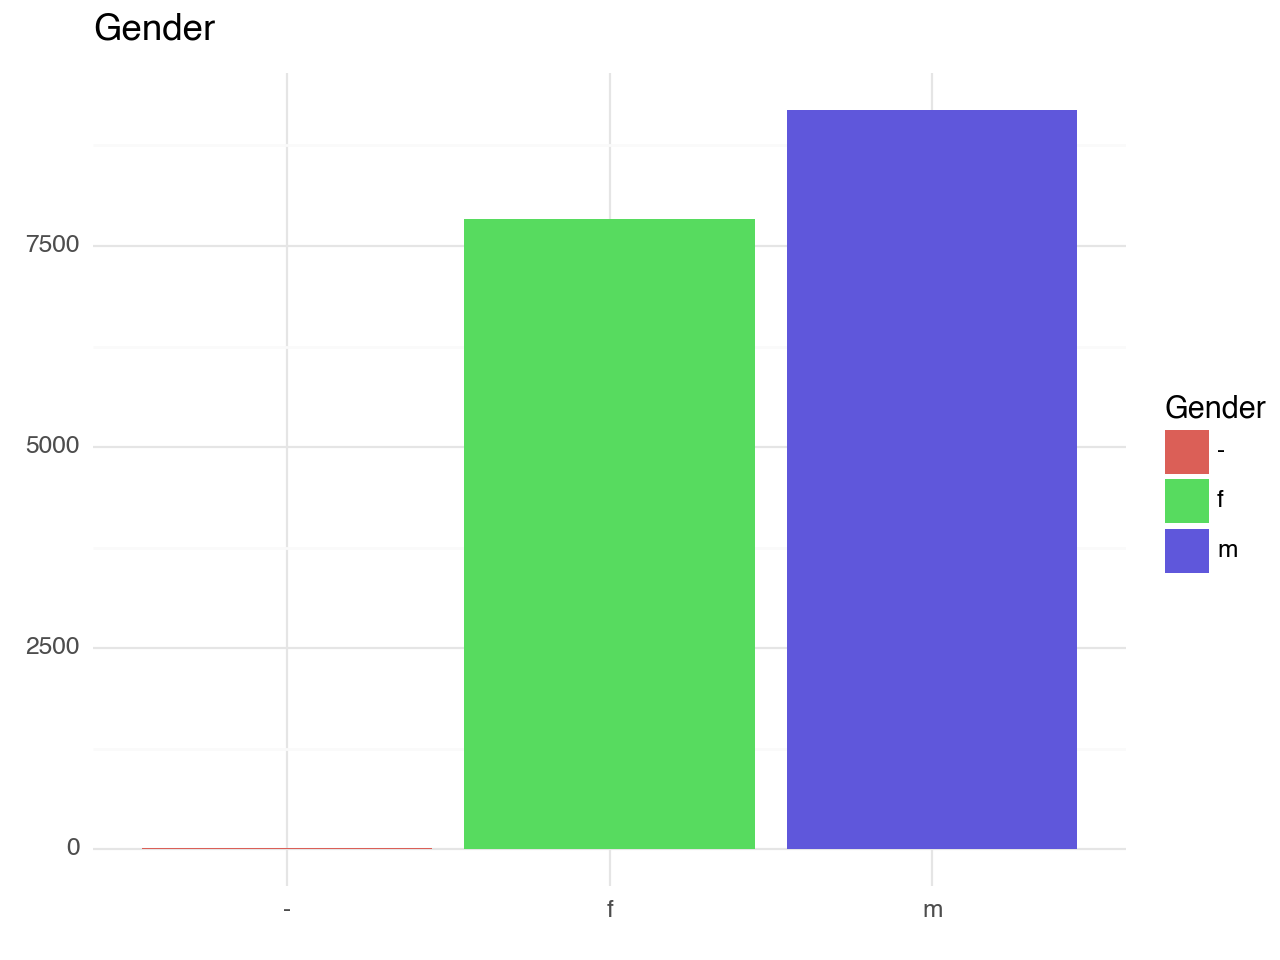

<Figure Size: (640 x 480)>

In [92]:
p1 = users.gender.value_counts()
p1 = pd.DataFrame(p1) 
p1.reset_index(inplace=True)
p1.columns = ["Gender", "conteo"]
ggplot(p1, aes( x= 'Gender', y="conteo", fill= 'Gender')) + geom_col() + theme_minimal() + ggtitle("Gender")  + xlab("") + ylab("") 